In [47]:
#ФИО - Мкртчян Ани Вазгеновна
#Отдел - Математика
#Профиль в Slack - Ani Mkrtchyan

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

In [58]:
# ЗАДАНИЕ 1
# Проанализировать набор данных и ответить на следующие вопросы:
# 1) Какой % наблюдений выходит за 05 и 95 квантиль?
# 2) Какому закону распределения отвечают данные? На основе чего вы так решили?

In [87]:
#РЕШЕНИЕ:

df_t1 = pd.read_csv('test_1.csv',sep = ';', names = ['Num', 'Values'], skiprows = 1)

#Рассчитываем 5 и 95 квантили:
quant = df_t1['Values'].quantile([.05, .95], interpolation='midpoint')
quant.index = ['5%', '95%']
print(pd.DataFrame({'Квантиль':quant.index, 'Значение':quant.values}), end = '\n\n')

#Рассчитаем % наблюдений, выходящих за 05 и 95 квантиль.
#Не считаем наблюдения, выходящие за 5 квантиль, так как меньше 1 нет значений:
print('% наблюдений выходящих за 05 и 95 квантиль:', 
      round(df_t1[df_t1['Values'] > df_t1['Values'].quantile(0.95, interpolation='midpoint')].shape[0]/df_t1.shape[0]*100, 3),
      end = '\n\n')

#Основные параметры распределения:
print ('Основные параметры распределения до чистки данных:')
print(df_t1['Values'].describe())

  Квантиль  Значение
0       5%       1.0
1      95%      52.0

% наблюдений выходящих за 05 и 95 квантиль: 4.987

Основные параметры распределения до чистки данных:
count    306839.000000
mean         10.146275
std          22.627378
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max         998.000000
Name: Values, dtype: float64


Основные параметры распределения после чистки данных:
count    291536.000000
mean          5.944456
std           9.562624
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max          52.000000
Name: Values, dtype: float64

Тест Шапиро: (0.5769650936126709, 0.0)


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


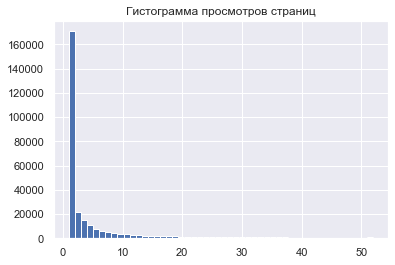

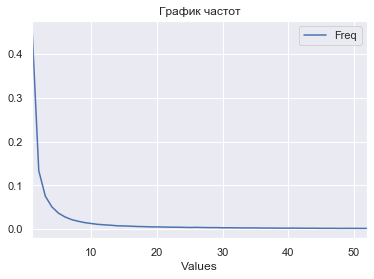

In [86]:
# Имеются сильные выбросы в данных с большими значениями параметра (перед анализом данных выбросы удаляем).
df_t1_2 = df_t1[(df_t1['Values'] <= df_t1['Values'].quantile(q = 0.95, interpolation='midpoint'))]

#Основные параметры распределения после чистки данных:
print ('Основные параметры распределения после чистки данных:')
print(df_t1_2['Values'].describe(), end = '\n\n')

#Отметим следующее:
#1. Выборка имеет большой объем;
#2. Чаще всего пользователи просматривали 1-2 страницы;
#3. Распределение выборки слишком далеко от нормального:
#   а) Тест Шапиро на нормальность распределения показал p-value --> 0.
#      Однако надо учесть, что мощность критерия велика при таком объеме выборки.
#   б) Если посмотреть на гистограмму и на график qqplot, то видно, что распределенеие действительно далеко от нормального.

#Гистограмма:
df_t1_2.hist(column = 'Values', bins = 50, label = 'Values')
plt.title('Гистограмма просмотров страниц')

#Тест Шапиро на нормальность распределения:
print('Тест Шапиро:', stats.shapiro(df_t1_2['Values']))

#График частот:
df_t1_2_freq = df_t1_2.groupby(['Values']).count()
df_t1_2_freq['Freq'] = df_t1_2_freq['Num'] / df_t1_2_freq['Num'].sum()
df_t1_2_freq.plot(y = 'Freq')
plt.title('График частот')

#Данные для расчета теоретических частот для критерия Пирсона:
df_t1_2_bins = pd.cut(df_t1_2['Values'].values, [i for i in range(0, 60, 5)])

((array([4.77248042e-04, 5.19278053e-04, 5.44429245e-04, ...,
         1.83678597e+03, 1.92575056e+03, 2.09534647e+03]),
  array([ 1,  1,  1, ..., 52, 52, 52], dtype=int64)),
 (0.0827147325567973, 1.7261400194680663, 0.9707707694160759))

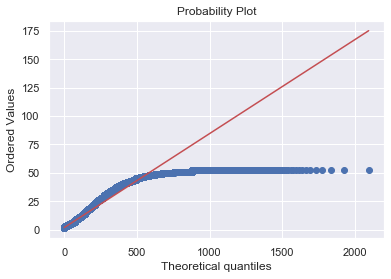

In [110]:
#График QQPlot. Пробуем определить распределение.
stats.probplot(df_t1_2['Values'], dist = stats.fatiguelife(10), plot=plt)

#Из всех распределений в scipy.stats больше всего для минимальных значений параметра подошло 
#распределение fatiguelife (см. график qqplot).На втором месте экспоненциальное. 
#Однако экспериментальные частоты максимальных значений намного ниже теоретических значений.
#Отдельный расчет теоретических значений для критерия Пирсона для экспоненциального рас-ия тоже показал,
#что частоты максимальных значений ниже теоретических (по расчетам выходило в 15-25 раз меньше)
#Возможно,следует придумать свою формулу для распределения.fatiguelife(10)

In [62]:
# ЗАДАНИЕ 2
# Определить, можно сравнить две представленные выборки t критерием Стьюдента? 
# Если нельзя сравнивать t-критерием, то что будем использовать и почему?
# Ответ аргументировать и описать

Sample A
             Values
count  88212.000000
mean       5.923434
std        9.643628
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       53.000000

Sample B
             Values
count  86975.000000
mean       6.096798
std        9.812361
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max       53.000000



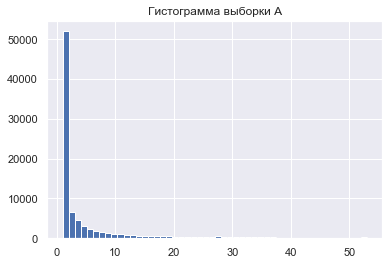

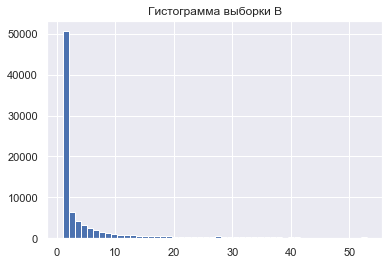

Тест Шапиро для выборки А: (0.5699361562728882, 0.0)

Тест Шапиро для выборки B: (0.5789896249771118, 0.0)

Т-тест: Ttest_indResult(statistic=-3.729534778404528, pvalue=0.00019189404427638284)

Тест Манна-Уитни: MannwhitneyuResult(statistic=3795990064.5, pvalue=3.3502362573100374e-05) 



In [83]:
#РЕШЕНИЕ:

df_t2 = pd.read_csv('test_2.csv', sep = ':', names = ['Num', 'Sample', 'Values'], skiprows = 1, usecols = [1,2])

#Уберем выбросы с большими значениями в каждой выборке:
df_t2_A = df_t2[(df_t2['Sample'] == "A") & (df_t2['Values'] <= df_t2['Values'].quantile(q = 0.95, interpolation='midpoint'))]
df_t2_B = df_t2[(df_t2['Sample'] == "B") & (df_t2['Values'] <= df_t2['Values'].quantile(q = 0.95, interpolation='midpoint'))]

#Основные параметры выборок:
print('Sample A')
print(df_t2_A.describe(), end='\n\n')
print('Sample B')
print(df_t2_B.describe(), end='\n\n')

#Диаграммы:
df_t2_A.hist(column = 'Values', bins = 50, label = 'Sample A')
plt.title('Гистограмма выборки А')
df_t2_B.hist(column = 'Values', bins = 50, label = 'Sample B')
plt.title('Гистограмма выборки B')
plt.show()

#Для проведения Т-теста необходимо выполнения условий: 
#1)Дисперсии в выборках должны быть одинаковыми;
#2)Распределение признака в маленьких выборках должно быть нормальным.
#  Для больших выборок иногда допустимо отклонение распределения выборочных данных от нормальности для t-теста.
#  Это возможно, так как для t-теста важнее, чтобы распределение t-критерия было близко к t-распределению, 
#  а не распределение выборочных данных.

#Отметим следующее:
#1. Наши выборки имеют большой объем.
#2. Чаще всего пользователи просматривали 1-2 страницы в обеих выборках.
#3. В выборках имеются сильные выбросы с большими значениями папарметра (перед анализом данных выбросы удаляются).
#4. Распределения выборок слишком далеки от нормального:
#   а) Тест Шапиро на нормальность распределения для каждой выборки показал p-value --> 0.
#      Однако надо учесть, что мощность критерия велика при таком объеме выборки.
#   б) Если посмотреть на гистограмму и на график qqplot, то видно, что распределенеия действительно далеки от нормального.
print('Тест Шапиро для выборки А:', stats.shapiro(df_t2_A['Values']), end = '\n\n')
print('Тест Шапиро для выборки B:', stats.shapiro(df_t2_B['Values']), end = '\n\n')

#Попробуем применить T-тест. Получем значение p-value << 0,05. 
#Высокая мощность критерия за счет большого объема выборок позволяет говорить
#о статистически значимых различиях между средними двух выборок, несмотря на их близкие значения.
print('Т-тест:', stats.ttest_ind(df_t2_A['Values'], df_t2_B['Values']), end = '\n\n')

#Однако так как выборки все-таки распределены ненормально, лучше 
#для сравнения применить непараметрический U-критерий Манна-Уитни.
#Но надо заметить, что наши выборки не идеально подходят для данного теста (есть одинаковые значения параметра в выборках).
#Тест Манна-Уитни также показывает статистически значимые различия между характеристиками двух выборок.
print('Тест Манна-Уитни:', stats.mannwhitneyu(df_t2_A['Values'], df_t2_B['Values']), '\n')

In [64]:
# ЗАДАНИЕ 3
# Дано две выборки по a/b тесту.
# Две выборки несбалансированные - кол-во пользователей в каждой группе разные.
# метрика для валидации эксперимента - кол-во просмотренных страниц на пользователя 
# Как вы будете считать такой эксперимент и какие статистические методы будете использовать?

Variant A
count    14659.00
mean         5.82
std          9.37
min          1.00
25%          1.00
50%          2.00
75%          5.00
max         52.00
Name: Values, dtype: float64

Variant B
count    14659.000000
mean         5.934307
std          9.453528
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max         52.000000
Name: Values, dtype: float64



Text(0.5, 1.0, 'Гистограмма выборки D')

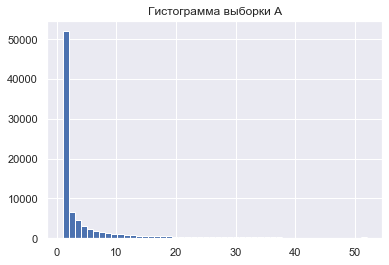

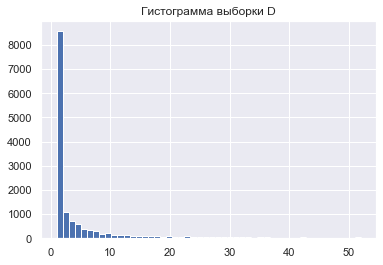

In [84]:
#РЕШЕНИЕ:
df_t3 = pd.read_csv('test_3.csv', sep = ';', names = ['Num', 'Variant', 'Values'], skiprows = 1)

#Уберем выбросы с большими значениями в каждой выборке:
df_t3_A = df_t3[(df_t3['Variant'] == 'A') & (df_t3['Values'] <= df_t3['Values'].quantile(q = 0.95, interpolation='midpoint'))]
df_t3_D = df_t3[(df_t3['Variant'] == 'D') & (df_t3['Values'] <= df_t3['Values'].quantile(q = 0.95, interpolation='midpoint'))]

#Так как выборки имеют разные объемы, извлечем случайным образом из 1-ой выборки новую, 
#которая будем иметь такой же размер, как и вторая выборка.
df_t3_A_sample = df_t3_A.sample(n = df_t3_D.shape[0],  random_state = None)

#Основные параметры выборок:
print('Variant A')
print(round(df_t3_A_sample['Values'].describe(),2), end = '\n\n')
print('Variant B')
print(df_t3_D['Values'].describe(), end = '\n\n')

#Диаграммы:
df_t3_A.hist(column = 'Values', bins = 50, label = 'Variant A')
plt.title('Гистограмма выборки А')
df_t3_D.hist(column = 'Values', bins = 50, label = 'Variant D')
plt.title('Гистограмма выборки D')

#Параметры и вид самих распределений похожи на характеристики распределений, полученных в 1-ых заданиях.

In [66]:
# ЗАДАНИЕ 4
# Есть данные с большой дисперсии у признака.
# Для их дальнейшего анализа дисперсию необходимо сократить.
# Как определить, что дисперсия действительно большая?
# Если она большая, как вы будете ее чистить?
# Ответ аргументировать и описать

In [77]:
#РЕШЕНИЕ:

df_t4 = pd.read_csv('test_4.csv', sep = ';', names = ['Num', 'Values'], skiprows = 1)
print ('ДО:')
print(df_t4['Values'].describe(), end = '\n\n')

#Рассчитаем коэффициент вариации для определения относительного разброса значений по отношению к  среднему значению.
#Если коэффициент вариации меньше 33%, то данные можно считать однородными. 
#В нашем случае коэф. вариации очень большой, данные не однородные.

print('Коэффициент вариации до =', round(df_t4['Values'].std()/df_t4['Values'].mean()*100, 2), '%', end = '\n\n')

#Для уменьшения дисперсии удалим выбросы из данных.
df_t4_2 = df_t4[(df_t4['Values']  >= df_t4['Values'].quantile(q = 0.05,  interpolation = 'midpoint')) &
                (df_t4['Values'] <= df_t4['Values'].quantile(q = 0.75,  interpolation = 'midpoint'))]

print ('ПОСЛЕ:')
print(df_t4_2['Values'].describe(), end = '\n\n')

#Посчитаем новый коэффициент вариации. Он оказался меньше, однако говорить об однородности данных все же нельзя:
print('Коэффициент вариации до =', round(df_t4_2['Values'].std()/df_t4_2['Values'].mean()*100, 2), '%', end = '\n\n')

#Если эксперимент позволяет, можно отсечь выборку еще больше.

ДО:
count    306839.000000
mean         10.146275
std          22.627378
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max         998.000000
Name: Values, dtype: float64

Коэффициент вариации до = 223.01 %

ПОСЛЕ:
count    232596.000000
mean          2.064842
std           1.598625
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           7.000000
Name: Values, dtype: float64

Коэффициент вариации до = 77.42 %

